In [7]:
# Import Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr, zscore

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# =======================================
# Step 1: Load and Explore the Dataset
# =======================================

df = pd.read_csv('ICM520_2024_2025_Report_PartA_DataSet_2000Rows.csv' )
dataset = df.copy()

print(dataset.info())
print(dataset['CATEGORY'].value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FEAT_0    2000 non-null   float64
 1   FEAT_1    2000 non-null   object 
 2   FEAT_2    2000 non-null   float64
 3   FEAT_3    2000 non-null   float64
 4   FEAT_4    2000 non-null   float64
 5   FEAT_5    2001 non-null   int64  
 6   FEAT_6    2001 non-null   int64  
 7   FEAT_7    2000 non-null   float64
 8   FEAT_8    2000 non-null   float64
 9   FEAT_9    1816 non-null   float64
 10  FEAT_10   2000 non-null   float64
 11  FEAT_11   2000 non-null   float64
 12  FEAT_12   2000 non-null   float64
 13  FEAT_13   2000 non-null   float64
 14  FEAT_14   2000 non-null   float64
 15  FEAT_15   2000 non-null   object 
 16  FEAT_16   2000 non-null   float64
 17  FEAT_17   2000 non-null   float64
 18  CATEGORY  2000 non-null   float64
dtypes: float64(15), int64(2), object(2)
memory usage: 297.2+ KB
None
CATE

FEAT_0        1
FEAT_1        1
FEAT_2        1
FEAT_3        1
FEAT_4        1
FEAT_5        0
FEAT_6        0
FEAT_7        1
FEAT_8        1
FEAT_9      185
FEAT_10       1
FEAT_11       1
FEAT_12       1
FEAT_13       1
FEAT_14       1
FEAT_15       1
FEAT_16       1
FEAT_17       1
CATEGORY      1
dtype: int64


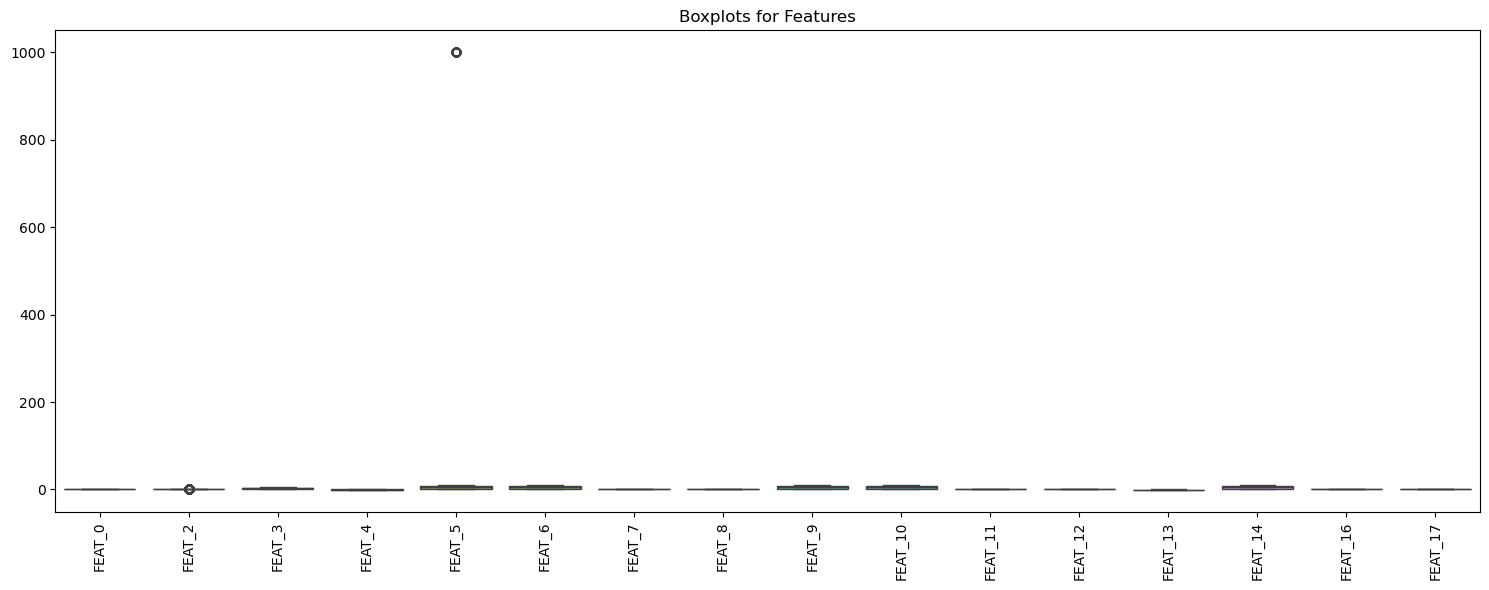

      FEAT_0 FEAT_1  FEAT_2  FEAT_3  FEAT_4  FEAT_5  FEAT_6  FEAT_7  FEAT_8  \
100     0.00  JOB_B     1.0     2.0    0.00    1000       8    0.03    0.16   
140     0.64  JOB_A     1.0     4.0   -0.64    1000       8    0.57    0.00   
144     0.93  JOB_D     2.0     2.0   -0.93    1000       1    0.13    0.40   
148     0.25  JOB_A     1.0     5.0   -0.25    1000       8    0.93    0.00   
169     0.09  JOB_A     1.0     5.0   -0.09    1000       5    0.97    0.62   
...      ...    ...     ...     ...     ...     ...     ...     ...     ...   
1864    0.39  JOB_B     2.0     2.0   -0.39    1000       8    0.07    0.46   
1867    0.14  JOB_A     2.0     3.0   -0.14    1000       2    0.17    0.39   
1904    0.97  JOB_A     1.0     1.0   -0.97    1000       0    0.19    0.91   
1943    0.28  JOB_A     2.0     4.0   -0.28    1000       1    0.21    0.13   
2000     NaN    NaN     NaN     NaN     NaN    1000      10     NaN     NaN   

      FEAT_9  FEAT_10  FEAT_11  FEAT_12  FEAT_13  F

In [9]:
# =======================================
# Step 2: Check for Missing Values and Outliers
# =======================================

print(dataset.isnull().sum())

# Boxplot for Outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=dataset.drop('CATEGORY', axis=1))
plt.title("Boxplots for Features")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Z-Score Method for FEAT_5's Outliers
dataset['FEAT_5_zscore'] = zscore(dataset['FEAT_5'])
outliers_feat5 = dataset[np.abs(dataset['FEAT_5_zscore']) > 3]
print(outliers_feat5)

In [11]:
# =======================================
# Step 3: Clean the Data
# =======================================

clean_data = dataset[np.abs(dataset['FEAT_5_zscore']) <= 3].dropna()
allData = clean_data.drop('FEAT_5_zscore', axis=1)

In [13]:
# =======================================
# Step 4: Encode & Prepare Features
# =======================================

X = allData.drop('CATEGORY', axis=1)
y = allData['CATEGORY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22, stratify=y)

object_cols = X_train.select_dtypes(include=['object']).columns
encoders = {}
for col in object_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    encoders[col] = le

In [15]:
# =======================================
# Step 5: Normality Check
# =======================================

normal_features, uniform_features, other_features = [], [], []

for col in X_train.columns:
    skew = X_train[col].skew()
    kurt = X_train[col].kurtosis()
    if abs(skew) < 1 and abs(kurt) < 3:
        normal_features.append(col)
    elif abs(skew) < 0.5 and abs(kurt + 1.2) < 0.5:
        uniform_features.append(col)
    else:
        other_features.append(col)

print("Normal features:", normal_features)
print("Uniform features:", uniform_features)
print("Other features:", other_features)

for column in X_train.columns:
    skewness = X_train[column].skew()
    kurtosis = X_train[column].kurtosis()
    print(f"{column}: Skewness = {skewness:.2f}, Kurtosis = {kurtosis:.2f}")

Normal features: ['FEAT_0', 'FEAT_1', 'FEAT_2', 'FEAT_3', 'FEAT_4', 'FEAT_5', 'FEAT_6', 'FEAT_7', 'FEAT_8', 'FEAT_9', 'FEAT_10', 'FEAT_11', 'FEAT_12', 'FEAT_13', 'FEAT_14', 'FEAT_15', 'FEAT_16', 'FEAT_17']
Uniform features: []
Other features: []
FEAT_0: Skewness = 0.62, Kurtosis = -0.94
FEAT_1: Skewness = 0.75, Kurtosis = -0.91
FEAT_2: Skewness = -0.00, Kurtosis = -0.93
FEAT_3: Skewness = -0.01, Kurtosis = -1.01
FEAT_4: Skewness = -0.62, Kurtosis = -0.94
FEAT_5: Skewness = 0.03, Kurtosis = -1.24
FEAT_6: Skewness = -0.01, Kurtosis = -1.24
FEAT_7: Skewness = 0.62, Kurtosis = -0.92
FEAT_8: Skewness = 0.66, Kurtosis = -0.80
FEAT_9: Skewness = 0.03, Kurtosis = -1.26
FEAT_10: Skewness = -0.02, Kurtosis = -1.17
FEAT_11: Skewness = -0.00, Kurtosis = -1.08
FEAT_12: Skewness = 0.01, Kurtosis = -1.16
FEAT_13: Skewness = -0.01, Kurtosis = -1.16
FEAT_14: Skewness = 0.07, Kurtosis = -1.19
FEAT_15: Skewness = -0.02, Kurtosis = -2.00
FEAT_16: Skewness = 0.63, Kurtosis = -0.91
FEAT_17: Skewness = 0.68,

In [17]:
# =======================================
# Step 6: Feature Scaling
# =======================================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Maintain original index for proper alignment with y_train
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_train_scaled_df['CATEGORY'] = y_train

In [19]:
# =======================================
# Step 7: Correlation + P-Values
# =======================================

corr_matrix = X_train_scaled_df.corr()
target_corr = corr_matrix['CATEGORY'].drop('CATEGORY').sort_values(key=abs, ascending=False)

correlation_results = []
for feature in X_train_scaled_df.columns:
    corr, p_value = pearsonr(X_train_scaled_df[feature], y_train)
    correlation_results.append({
        'Feature': feature,
        'Correlation': corr,
        'P-Value': p_value
    })

correlation_df = pd.DataFrame(correlation_results).sort_values(by='Correlation', key=abs, ascending=False)
print(correlation_df[['Feature', 'Correlation', 'P-Value']])

     Feature  Correlation       P-Value
18  CATEGORY     1.000000  0.000000e+00
11   FEAT_11    -0.543548  4.191410e-95
2     FEAT_2     0.358146  2.216668e-38
8     FEAT_8     0.289346  4.707469e-25
0     FEAT_0     0.288210  7.321568e-25
4     FEAT_4    -0.288210  7.321568e-25
6     FEAT_6     0.245466  2.876531e-18
10   FEAT_10     0.129543  5.401338e-06
1     FEAT_1    -0.073306  1.027131e-02
16   FEAT_16     0.072235  1.144099e-02
5     FEAT_5     0.051018  7.426529e-02
15   FEAT_15    -0.041300  1.485569e-01
9     FEAT_9     0.025627  3.701569e-01
17   FEAT_17     0.021828  4.452914e-01
14   FEAT_14    -0.008329  7.708780e-01
12   FEAT_12    -0.001381  9.614807e-01
13   FEAT_13     0.001381  9.614807e-01
7     FEAT_7     0.001304  9.636430e-01
3     FEAT_3     0.000961  9.731953e-01


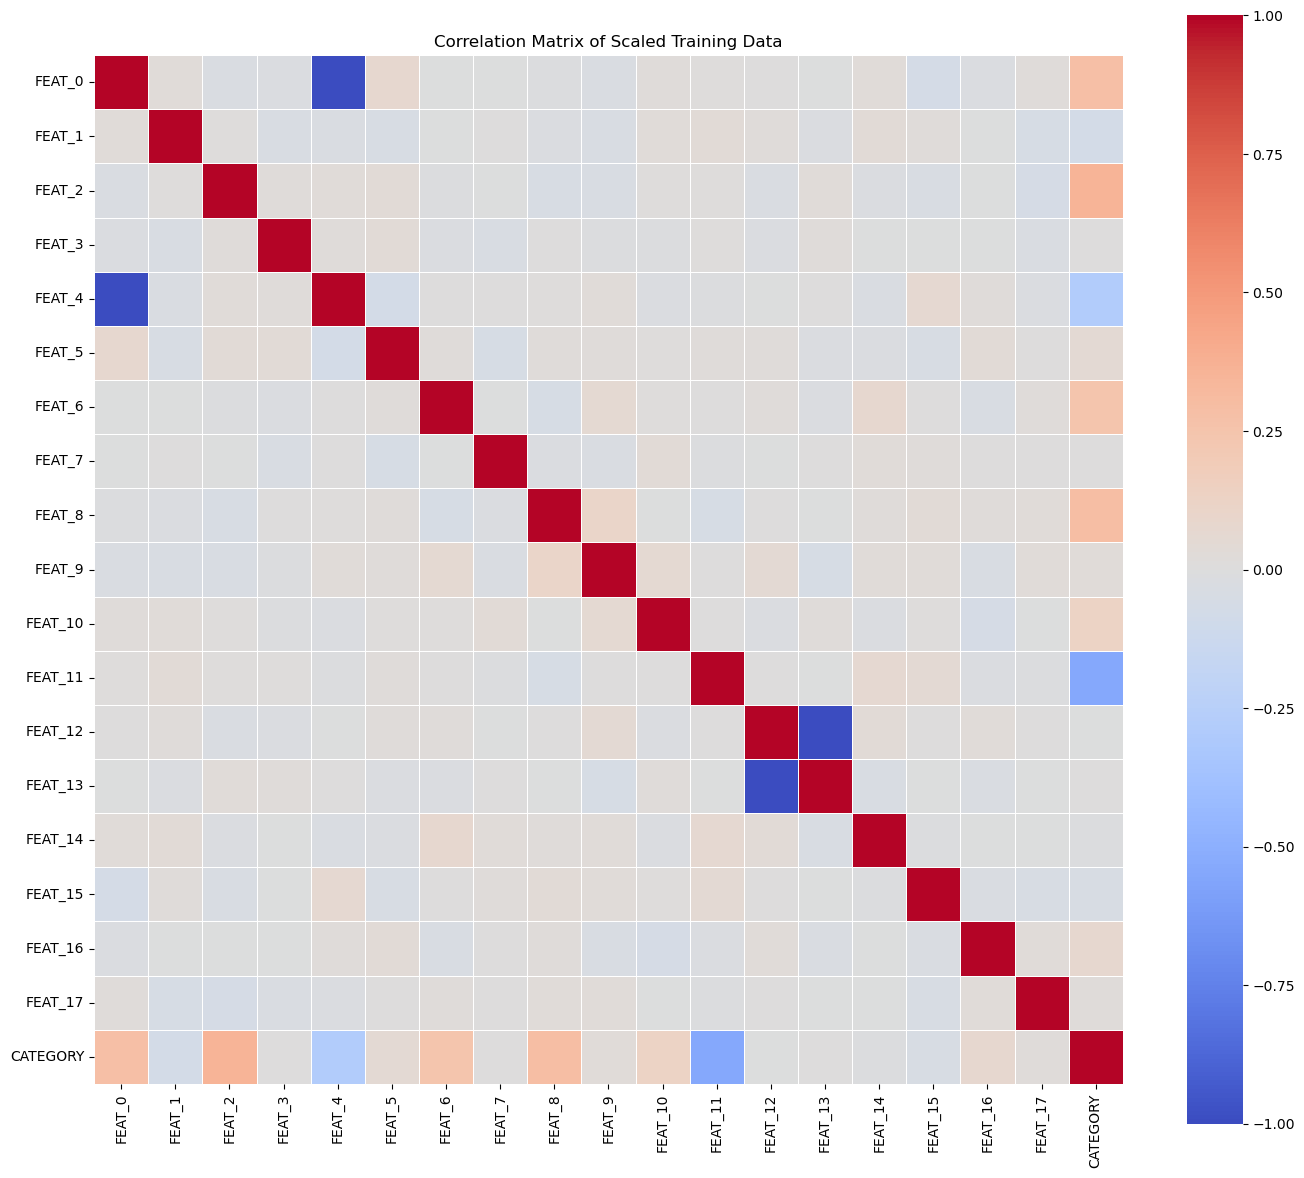

In [21]:
# Heatmap: Correlation
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix of Scaled Training Data")
plt.tight_layout()
plt.show()

C:\Users\zulyo\AppData\Local\Temp\ipykernel_25104\2742962374.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette="viridis")


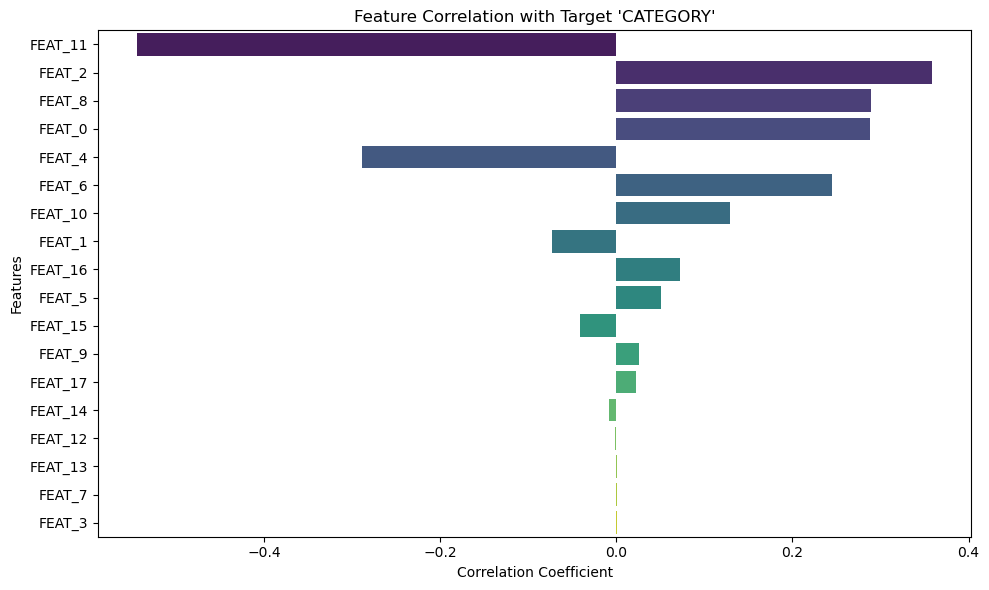

In [23]:
# Bar Plot: Correlation with Target
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="viridis")
plt.title("Feature Correlation with Target 'CATEGORY'")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

C:\Users\zulyo\AppData\Local\Temp\ipykernel_25104\2617849840.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importances, palette='viridis')


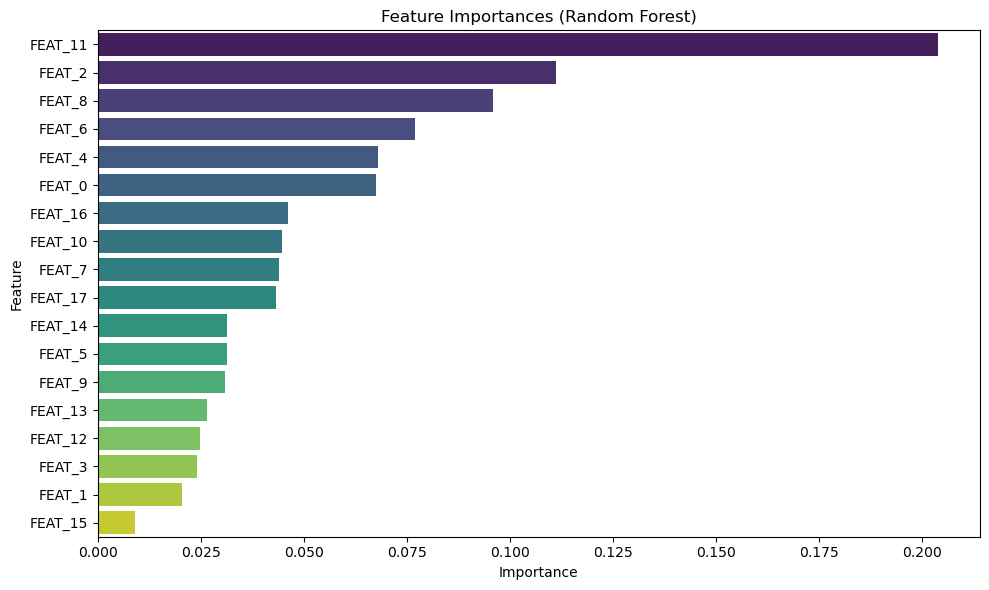

In [27]:
# =======================================
# Step 8: Random Forest Feature Importance
# =======================================

rf = RandomForestClassifier(n_estimators=100, random_state=22)
rf.fit(X_train_scaled, y_train)

importances = rf.feature_importances_
feature_names = X_train.columns

feat_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importances, palette='viridis')
plt.title('Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

In [29]:
# =======================================
# Step 9: Feature Selection and Reprocessing
# =======================================

selected_features = ['FEAT_11', 'FEAT_2', 'FEAT_8', 'FEAT_6', 'FEAT_4', 'FEAT_10', 'FEAT_16']
X = X[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22, stratify=y)
for col in object_cols:
    le = encoders[col]
    if col in X_train.columns:
        X_train[col] = le.transform(X_train[col])
        X_test[col] = le.transform(X_test[col])

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

\n=== TRAINING SET EVALUATION ===

Logistic Regression Training Accuracy: 0.6751
              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77       361
         1.0       0.57      0.60      0.59       387
         2.0       0.63      0.62      0.63       313
         3.0       0.80      0.73      0.76       164

    accuracy                           0.68      1225
   macro avg       0.70      0.68      0.69      1225
weighted avg       0.68      0.68      0.68      1225


K-Nearest Neighbors Training Accuracy: 0.8441
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89       361
         1.0       0.80      0.85      0.83       387
         2.0       0.82      0.81      0.81       313
         3.0       0.95      0.77      0.85       164

    accuracy                           0.84      1225
   macro avg       0.86      0.83      0.84      1225
weighted avg       0.85      0.84      0.84      1225


R

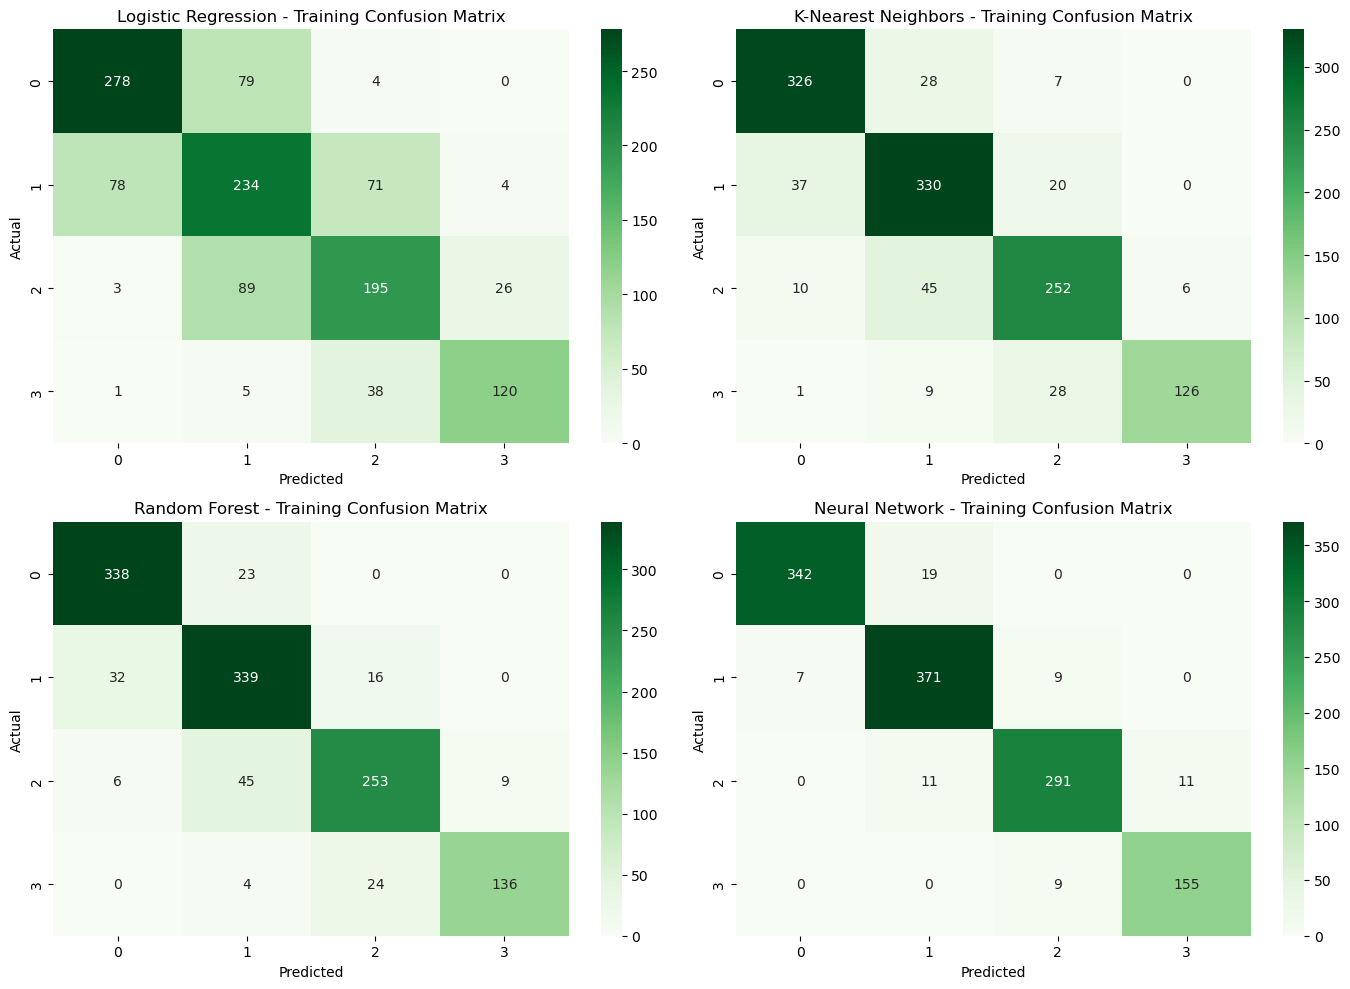

In [39]:
# =======================================
# Step 10: Model Training & Evaluation
# =======================================

models = {
    "Logistic Regression": LogisticRegression(random_state=22),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_leaf=10, max_features='sqrt', random_state=22),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(32, 16), alpha=0.3, learning_rate_init=0.0005, max_iter=2000, random_state=22)
}

train_accuracies = {}
train_conf_matrices = {}
train_preds = {}

print("\\n=== TRAINING SET EVALUATION ===")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    
    acc = accuracy_score(y_train, y_train_pred)
    cm = confusion_matrix(y_train, y_train_pred)

    train_accuracies[name] = acc
    train_conf_matrices[name] = cm
    train_preds[name] = y_train_pred

    print(f"\n{name} Training Accuracy: {acc:.4f}")
    print(classification_report(y_train, y_train_pred))

# Plot Training Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
for i, (name, cm) in enumerate(train_conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=axes[i])
    axes[i].set_title(f"{name} - Training Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()


=== TEST SET EVALUATION ===

Logistic Regression - Test Accuracy: 0.6141
              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75       155
         1.0       0.50      0.50      0.50       167
         2.0       0.53      0.54      0.54       134
         3.0       0.73      0.74      0.74        70

    accuracy                           0.61       526
   macro avg       0.63      0.63      0.63       526
weighted avg       0.62      0.61      0.61       526


Neural Network - Test Accuracy: 0.8783
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93       155
         1.0       0.84      0.90      0.87       167
         2.0       0.85      0.82      0.83       134
         3.0       0.87      0.87      0.87        70

    accuracy                           0.88       526
   macro avg       0.88      0.87      0.88       526
weighted avg       0.88      0.88      0.88       526


Random Forest -

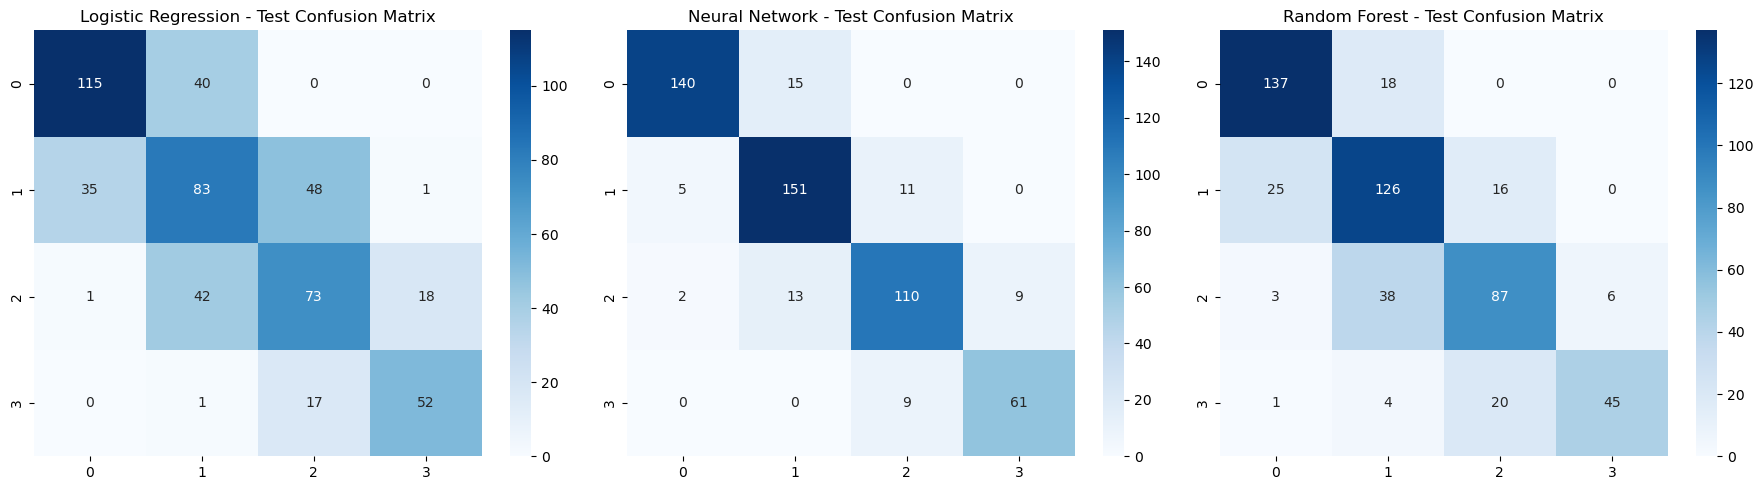

In [41]:
# =======================================
# Step 11: Select Top 3 Models (Include Logistic)
# =======================================

non_logreg_models = {k: v for k, v in train_accuracies.items() if k != "Logistic Regression"}
top_2_others = sorted(non_logreg_models.items(), key=lambda x: x[1], reverse=True)[:2]
top_3_models = ["Logistic Regression"] + [name for name, _ in top_2_others]

# Test Set Evaluation
print("\n=== TEST SET EVALUATION ===")
test_conf_matrices = {}

for name in top_3_models:
    model = models[name]
    y_test_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_test_pred)
    cm = confusion_matrix(y_test, y_test_pred)

    print(f"\n{name} - Test Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_test_pred))
    test_conf_matrices[name] = cm

# Plot Test Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (name, cm) in enumerate(test_conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{name} - Test Confusion Matrix")
plt.tight_layout()
plt.show()

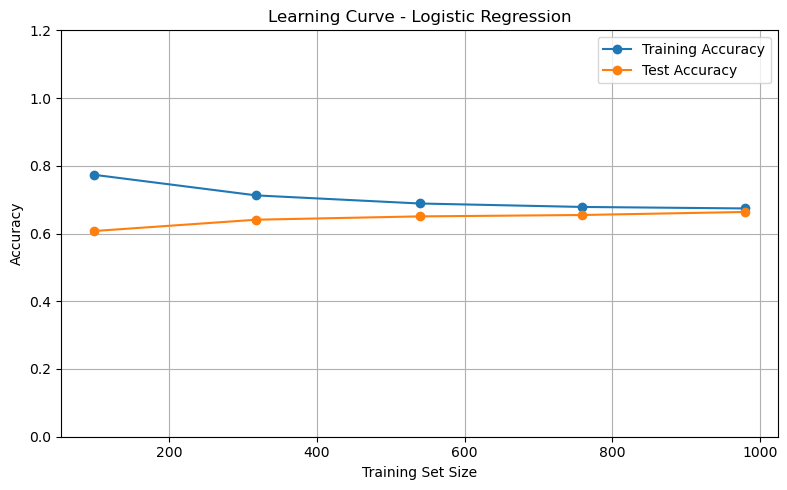

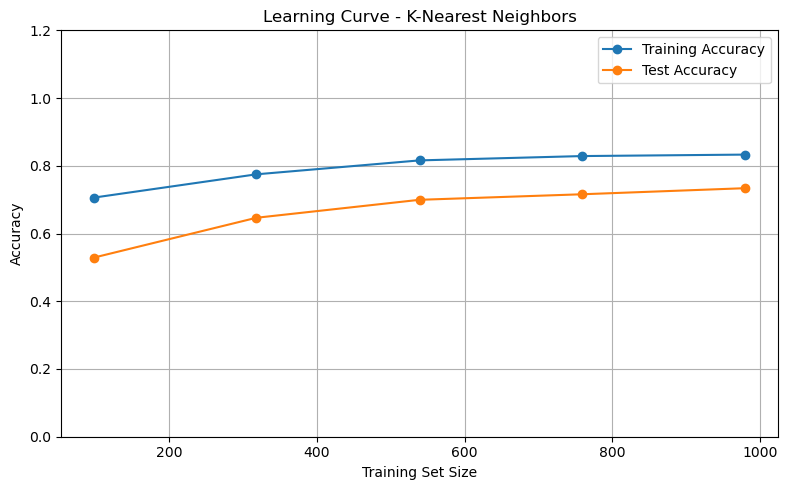

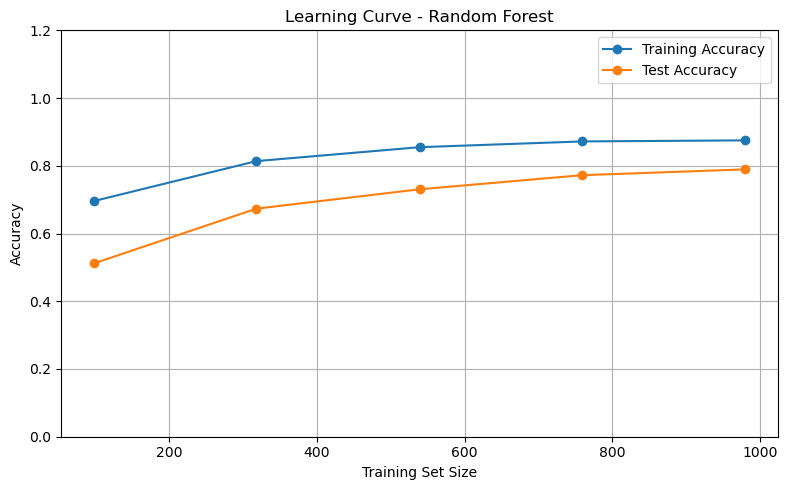

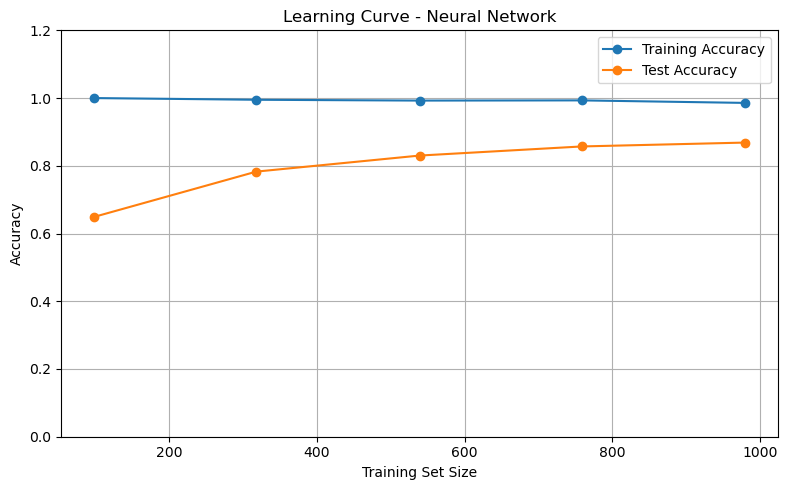

In [43]:
# =======================================
# Step 12: Learning Curves
# =======================================

def plot_learning_curve(model, X, y, title, cv=5):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=cv, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5), random_state=22
    )
    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
    plt.plot(train_sizes, val_mean, 'o-', label='Test Accuracy')
    plt.title(f"Learning Curve - {title}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1.2)  # 🔒 fix y-axis scale to [0, 1]
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

for name in models:
    plot_learning_curve(models[name], X_train_scaled, y_train, name)

In [47]:
# =======================================
# Step 13: Minimum Features for ≥70% Accuracy (NN)
# =======================================

print("\n=== Finding Minimum Number of Features for ≥70% Accuracy (Neural Network) ===")

rf = RandomForestClassifier(random_state=22)
rf.fit(X_train_scaled, y_train)
feature_ranks = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

nn_feature_results = []
for k in range(1, len(feature_ranks) + 1):
    top_k_features = feature_ranks['Feature'][:k].tolist()
    X_subset = allData[top_k_features]
    X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(
        X_subset, y, test_size=0.3, random_state=22, stratify=y
    )
    
    for col in X_train_k.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X_train_k[col] = le.fit_transform(X_train_k[col])
        X_test_k[col] = le.transform(X_test_k[col])

    scaler_k = StandardScaler()
    X_train_k_scaled = scaler_k.fit_transform(X_train_k)
    X_test_k_scaled = scaler_k.transform(X_test_k)
    
    model = MLPClassifier(hidden_layer_sizes=(32, 16), alpha=0.3, learning_rate_init=0.0005, max_iter=2000, random_state=22)
    model.fit(X_train_k_scaled, y_train_k)
    y_pred_k = model.predict(X_test_k_scaled)
    
    acc = accuracy_score(y_test_k, y_pred_k)
    nn_feature_results.append((k, acc))
    
    print(f"{k} features → Accuracy: {acc:.4f}")
    

valid_nn_results = [(k, acc) for k, acc in nn_feature_results if acc >= 0.70]
if valid_nn_results:
    min_k = min(valid_nn_results, key=lambda x: x[0])
    print(f"\n Minimum number of features to maintain ≥70% accuracy: {min_k[0]}")
else:
    print("\n No feature subset maintained ≥70% accuracy.")


=== Finding Minimum Number of Features for ≥70% Accuracy (Neural Network) ===
1 features → Accuracy: 0.4734
2 features → Accuracy: 0.4829
3 features → Accuracy: 0.5589
4 features → Accuracy: 0.7148
5 features → Accuracy: 0.8498
6 features → Accuracy: 0.8270
7 features → Accuracy: 0.8764

 Minimum number of features to maintain ≥70% accuracy: 4


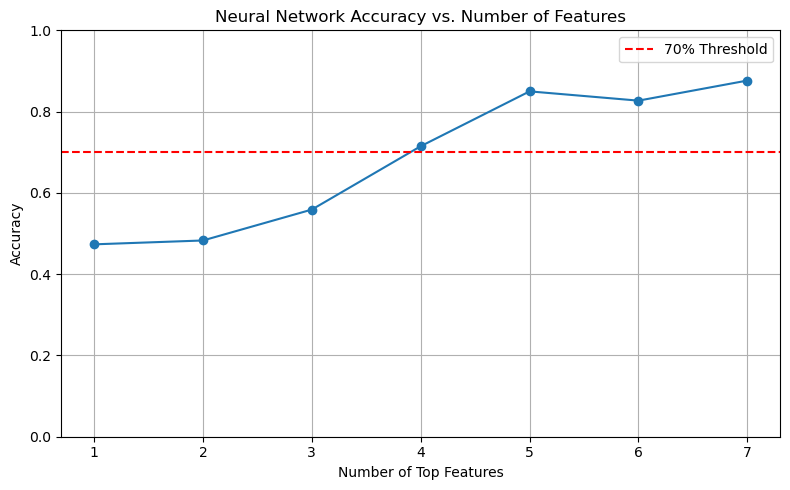

In [49]:
# Line Plot: Accuracy vs. Number of Features
ks, accs = zip(*nn_feature_results)
plt.figure(figsize=(8, 5))
plt.plot(ks, accs, marker='o')
plt.axhline(y=0.70, color='r', linestyle='--', label="70% Threshold")
plt.title("Neural Network Accuracy vs. Number of Features")
plt.xlabel("Number of Top Features")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()